In [1]:
%autosave 0

Autosave disabled


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import TimeSeriesSplit
from datetime import timedelta, datetime
import statsmodels.api as sm

from env import user, password, host
import QMCBT_01_acquire as acquire
import QMCBT_02_prepare as prepare


import warnings
warnings.filterwarnings("ignore")

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

# Exploratory Analysis Exercise
Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the ```store item demand``` dataset and the ```opsd``` dataset.

For the ```store item demand``` data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

**Note: When resampling data, use a mean() aggregation method.**

<div class="alert alert-success">


# ```Store Item Demand``` data

### Load your store item demand data using your acquire and/or prepare functions.

In [3]:
# Acquire Store Data
store_df = acquire.wrangle_store_data()
# Prepare Store Data
store_df = prepare.prep_store_data(store_df, 'sale_date')

In [4]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   store_id        913000 non-null  int64  
 1   item_id         913000 non-null  int64  
 2   item_upc14      913000 non-null  int64  
 3   item_upc12      913000 non-null  int64  
 4   item_brand      913000 non-null  object 
 5   item_name       913000 non-null  object 
 6   item_price      913000 non-null  float64
 7   sale_id         913000 non-null  int64  
 8   sale_amount     913000 non-null  int64  
 9   store_address   913000 non-null  object 
 10  store_zipcode   913000 non-null  int64  
 11  store_city      913000 non-null  object 
 12  store_state     913000 non-null  object 
 13  day             913000 non-null  int64  
 14  day_of_week     913000 non-null  object 
 15  weekday_number  913000 non-null  int64  
 16  year            913000 non-null  int64  

In [5]:
store_df.isnull().sum()

store_id          0
item_id           0
item_upc14        0
item_upc12        0
item_brand        0
item_name         0
item_price        0
sale_id           0
sale_amount       0
store_address     0
store_zipcode     0
store_city        0
store_state       0
day               0
day_of_week       0
weekday_number    0
year              0
month             0
month_number      0
sales_total       0
dtype: int64

In [6]:
store_df.T

sale_date,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,...,2017-12-31,2017-12-31,2017-12-31,2017-12-31,2017-12-31,2017-12-31,2017-12-31,2017-12-31,2017-12-31,2017-12-31
store_id,1,3,10,3,3,3,10,3,3,10,...,7,7,7,7,7,7,7,7,7,10
item_id,1,17,7,18,19,20,6,21,22,5,...,34,35,36,37,38,39,40,41,28,50
item_upc14,35200264013,88313590791,70177154004,21200725340,41520035646,204040000000,74170388732,753950001954,16000288829,759283100036,...,312546628694,33674100066,610358991525,73575295003,30768540548,28400029254,42272008063,31000670016,719175900007,47445919221
item_upc12,35200264013,88313590791,70177154004,21200725340,41520035646,204040000000,74170388732,753950001954,16000288829,759283100036,...,312546628694,33674100066,610358991525,73575295003,30768540548,28400029254,42272008063,31000670016,719175900007,47445919221
item_brand,Riceland,Ducal,Twinings Of London,Scotch,Careone,Usda Produce,Sally Hansen,Doctors Best,Betty Crocker,Back To Nature,...,Halls,Natures Way,Deerfields Gluten Free,Nakano,Sundown Naturals,Munchies,Amys,P.f. Changs,Usda Produce,Choice
item_name,Riceland American Jazmine Rice,Ducal Refried Red Beans,Twinings Of London Classics Lady Grey Tea - 20 Ct,Scotch Removable Clear Mounting Squares - 35 Ct,Careone Family Comb Set - 8 Ct,Plums Black,Sally Hansen Nail Color Magnetic 903 Silver El...,Doctors Best Best Curcumin C3 Complex 1000mg T...,Betty Crocker Twin Pack Real Potatoes Scallope...,Back To Nature Gluten Free White Cheddar Rice ...,...,Halls Menthol Cough Suppresant/oral Anesthetic...,Natures Way Forskohlii - 60 Ct,Rice Bran Gluten Free Dinner Rolls Plain,Nakano Seasoned Rice Vinegar Original,Sundown Naturals Essential Electrolytes Tropic...,Munchies Sandwich Crackers Cheddar Cheese On G...,Amys Light & Lean Spaghetti Italiano,P.f. Changs Home Menu Meal For Two Beef With B...,Guava,Choice Organic Teas Black Tea Classic Black - ...
item_price,0.84,1.16,9.64,4.39,0.74,5.62,6.93,8.09,7.31,2.61,...,4.17,5.19,7.95,9.59,3.45,9.02,0.6,5.62,7.52,5.2
sale_id,1,295813,125995,314073,332333,350593,107735,368853,387113,89475,...,615362,633622,651882,670142,688402,706662,724922,743182,505802,913000
sale_amount,13,26,32,45,34,29,32,25,50,8,...,18,62,53,16,46,31,22,19,59,82
store_address,12125 Alamo Ranch Pkwy,2118 Fredericksburg Rdj,8503 NW Military Hwy,2118 Fredericksburg Rdj,2118 Fredericksburg Rdj,2118 Fredericksburg Rdj,8503 NW Military Hwy,2118 Fredericksburg Rdj,2118 Fredericksburg Rdj,8503 NW Military Hwy,...,12018 Perrin Beitel Rd,12018 Perrin Beitel Rd,12018 Perrin Beitel Rd,12018 Perrin Beitel Rd,12018 Perrin Beitel Rd,12018 Perrin Beitel Rd,12018 Perrin Beitel Rd,12018 Perrin Beitel Rd,12018 Perrin Beitel Rd,8503 NW Military Hwy


<div class="alert alert-warning">


# 1. Using a human-based approach, split your dataset into train and test sets.

In [7]:
# Train test split on the Year:
train = store_df[:'2016']
test = store_df['2017']

<div class="alert alert-warning">


# 2. Visualize your train-test split.

<AxesSubplot:xlabel='sale_date'>

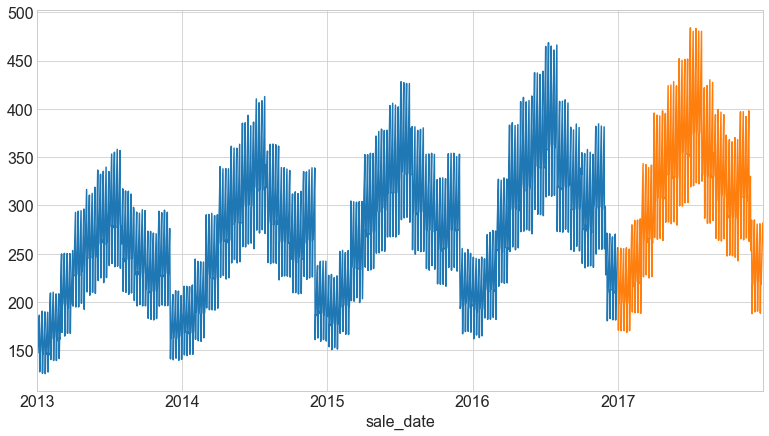

In [8]:
# Visualize the split data:

train.resample('D').sales_total.mean().plot()
test.resample('D').sales_total.mean().plot()

### Only use your train data set to perform the following tasks:

<div class="alert alert-warning">


# 3. Resample your data and visualize it.

In [9]:
# y is the resampled daily data:

y = train.resample('D').sales_total.mean()
y.head()

sale_date
2013-01-01    147.68802
2013-01-02    147.14116
2013-01-03    156.33896
2013-01-04    168.93546
2013-01-05    175.24370
Freq: D, Name: sales_total, dtype: float64

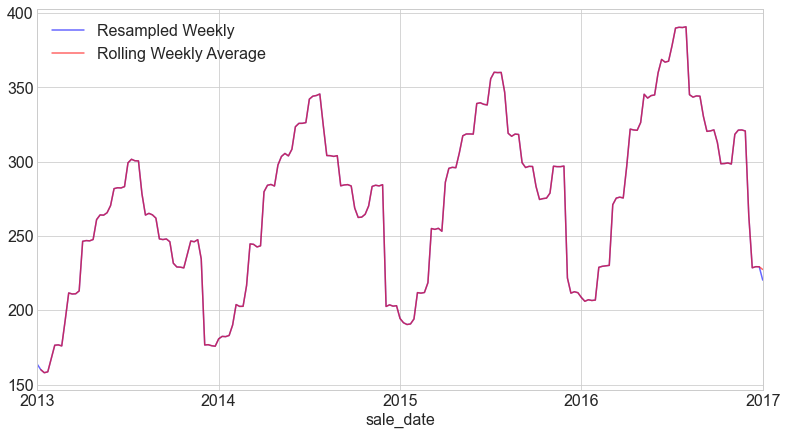

In [10]:
# Plot the weekly average & the 7-day moving average. Compare the 2 plots.

y.resample('W').mean().plot(label='Resampled Weekly', alpha=.6, color = 'blue')
y.rolling(7).mean().plot(label='Rolling Weekly Average', alpha=.6, color = 'red')
plt.legend()

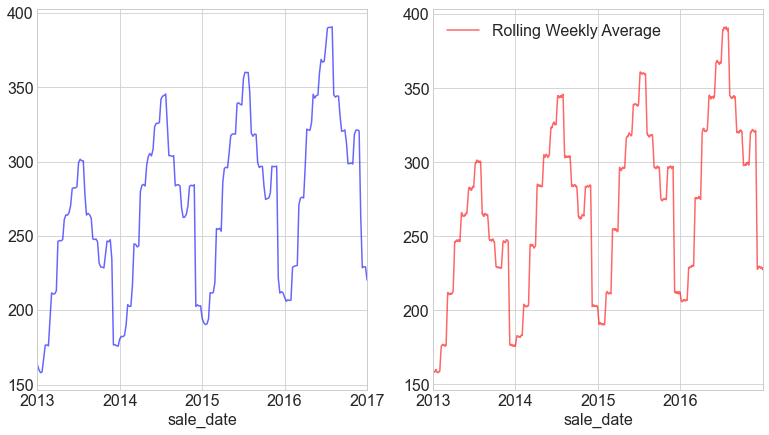

In [11]:
# Plot the weekly average & the 7-day moving average. Compare the 2 plots.
plt.subplot(1,2,1)
y.resample('W').mean().plot(label='Resampled Weekly', alpha=.6, color = 'blue')
plt.subplot(1,2,2)
y.rolling(7).mean().plot(label='Rolling Weekly Average', alpha=.6, color = 'red')
plt.legend()

Text(0, 0.5, 'Difference between days')

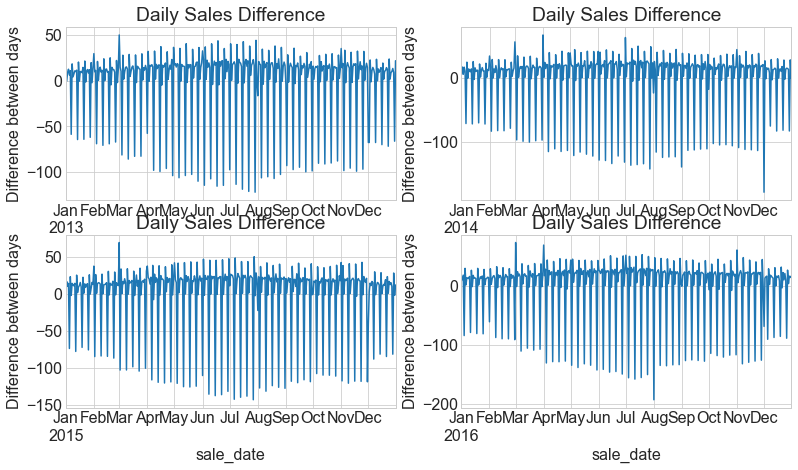

In [12]:
# Plot the daily difference of each year. 
# Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

plt.subplot(2,2,1)
y.diff()['2013'].plot()
plt.title('Daily Sales Difference')
plt.ylabel('Difference between days')

plt.subplot(2,2,2)
y.diff()['2014'].plot()
plt.title('Daily Sales Difference')
plt.ylabel('Difference between days')

plt.subplot(2,2,3)
y.diff()['2015'].plot()
plt.title('Daily Sales Difference')
plt.ylabel('Difference between days')

plt.subplot(2,2,4)
y.diff()['2016'].plot()
plt.title('Daily Sales Difference')
plt.ylabel('Difference between days')

#plt.title('Daily Sales Difference')
#np.linspace(0,4,1000)

Text(0, 0.5, '% Change')

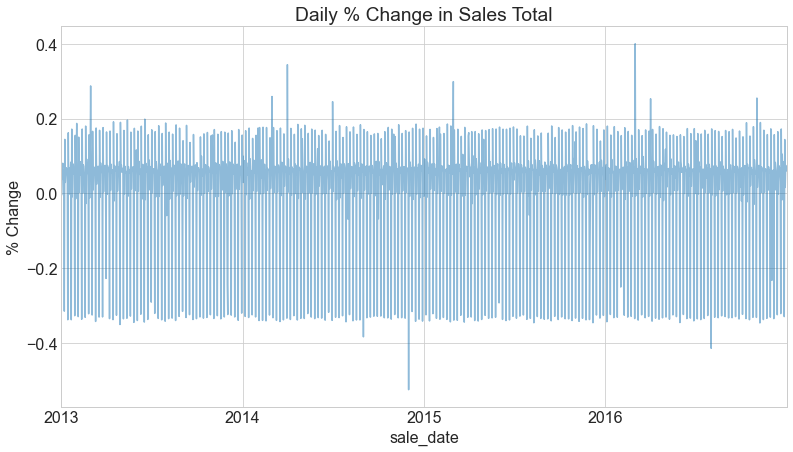

In [13]:
# Maybe it would be helpful to look at percent change as well:

(y.diff() / y.shift()).plot(alpha=.5)
plt.title('Daily % Change in Sales Total')
plt.ylabel('% Change')

<div class="alert alert-warning">


# 4. Creating a rolling (moving) average of your data and visualize it.


[Text(0.5, 1.0, 'Monthly % Change in Sales Total')]

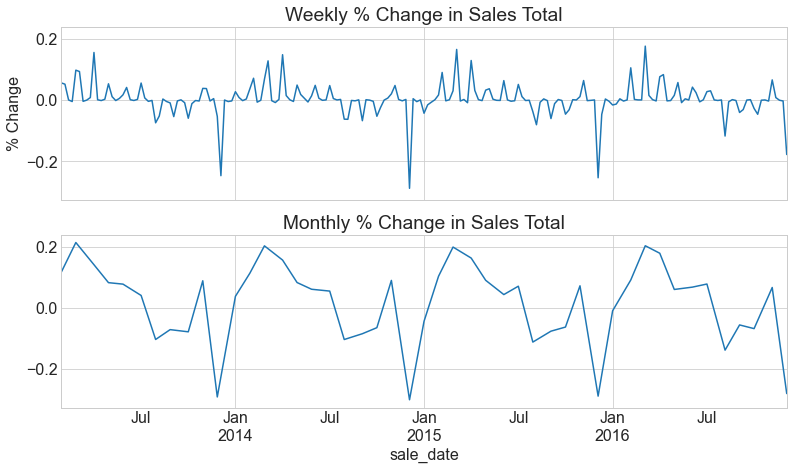

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)

weekly = y.resample('W').mean()
(weekly.diff() / weekly.shift()).plot(ax=ax1)
ax1.set(title='Weekly % Change in Sales Total', ylabel='% Change', xlabel='')

monthly = y.resample('M').mean()
(monthly.diff() / monthly.shift()).plot(ax=ax2)
ax2.set(title='Monthly % Change in Sales Total')

[Text(0.5, 1.0, 'Yearly % Change in Sales Total'),
 Text(0, 0.5, '% Change'),
 Text(0.5, 0, '')]

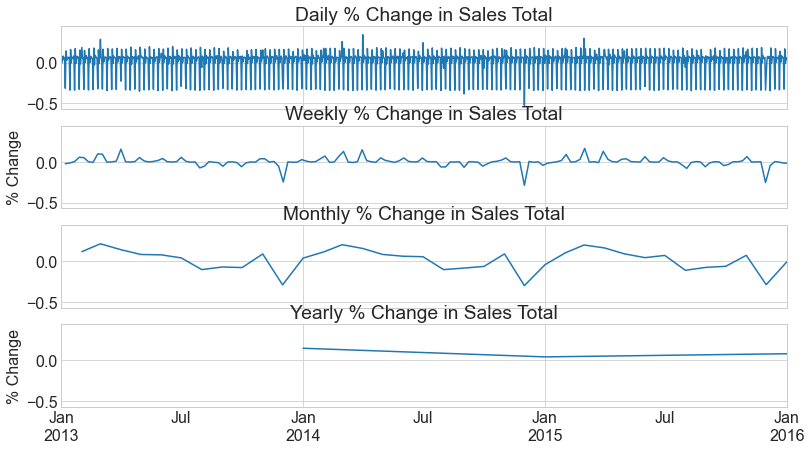

In [15]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, sharey=True)

daily = y.resample('D').mean()
(daily.diff() / daily.shift()).plot(ax=ax1)
ax1.set(title='Daily % Change in Sales Total')

weekly = y.resample('W').mean()
(weekly.diff() / weekly.shift()).plot(ax=ax2)
ax2.set(title='Weekly % Change in Sales Total', ylabel='% Change', xlabel='')

monthly = y.resample('M').mean()
(monthly.diff() / monthly.shift()).plot(ax=ax3)
ax3.set(title='Monthly % Change in Sales Total')

yearly = y.resample('Y').mean()
(yearly.diff() / yearly.shift()).plot(ax=ax4)
ax4.set(title='Yearly % Change in Sales Total', ylabel='% Change', xlabel='')

<div class="alert alert-warning">


# 5. Plot the difference in sales from one day to the next.

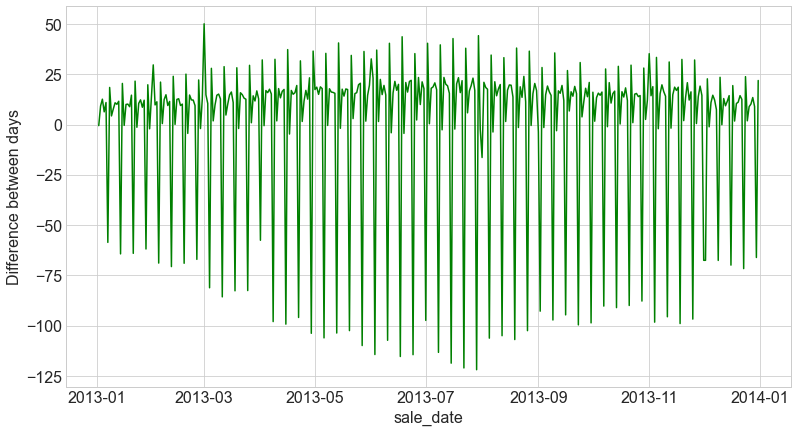

In [16]:
plt.plot(y.diff()['2013'], color='green')
plt.xlabel('sale_date')
plt.ylabel('Difference between days')
#plt.title('Daily Sales Difference')
plt.show()

<div class="alert alert-warning">


# 6. Plot the % difference in sales from one day to the next.

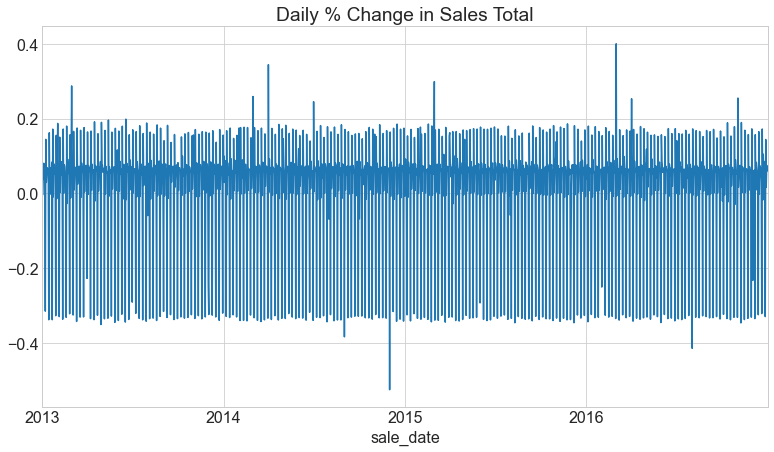

In [17]:
fig, (ax1) = plt.subplots(1, 1, sharex=True, sharey=True)

daily = y.resample('D').mean()
(daily.diff() / daily.shift()).plot(ax=ax1)
ax1.set(title='Daily % Change in Sales Total')
plt.show()

<div class="alert alert-warning">


# 7. Plot the % difference in sales from one week to the next.


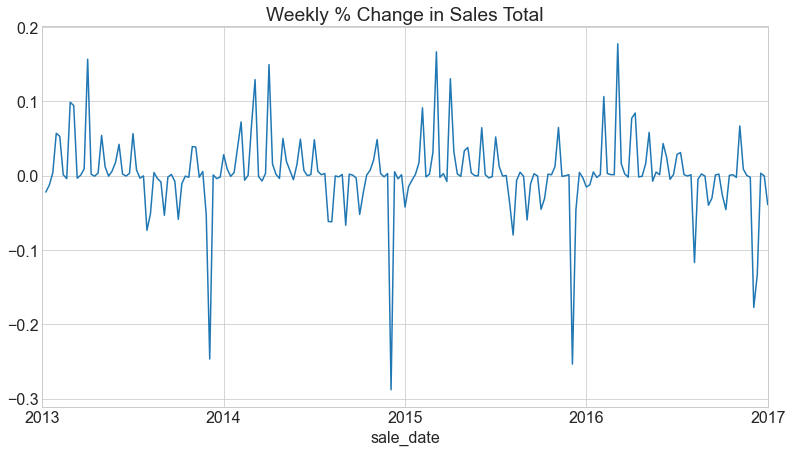

In [18]:
fig, (ax1) = plt.subplots(1, 1, sharex=True, sharey=True)

weekly = y.resample('W').mean()
(weekly.diff() / weekly.shift()).plot(ax=ax1)
ax1.set(title='Weekly % Change in Sales Total')
plt.show()

<div class="alert alert-warning">


# 8. Plot the % difference in sales from one month to the next.


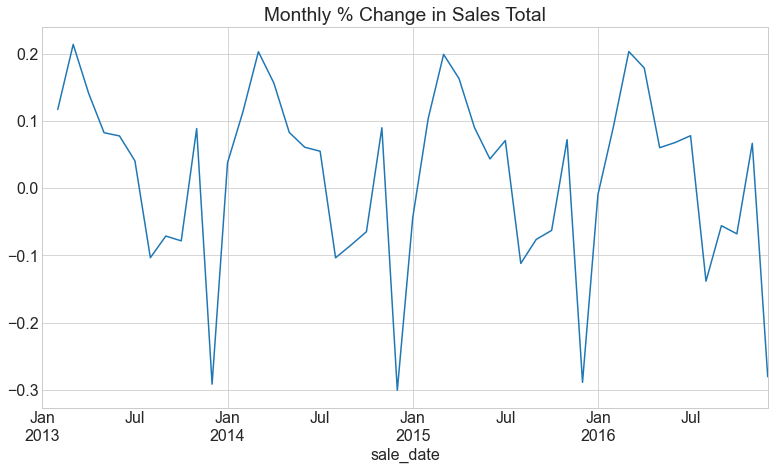

In [19]:
fig, (ax1) = plt.subplots(1, 1, sharex=True, sharey=True)

monthly = y.resample('M').mean()
(monthly.diff() / monthly.shift()).plot(ax=ax1)
ax1.set(title='Monthly % Change in Sales Total')
plt.show()

<div class="alert alert-warning">


# 9. Visualize an autocorrelation plot on a weekly resampling.


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

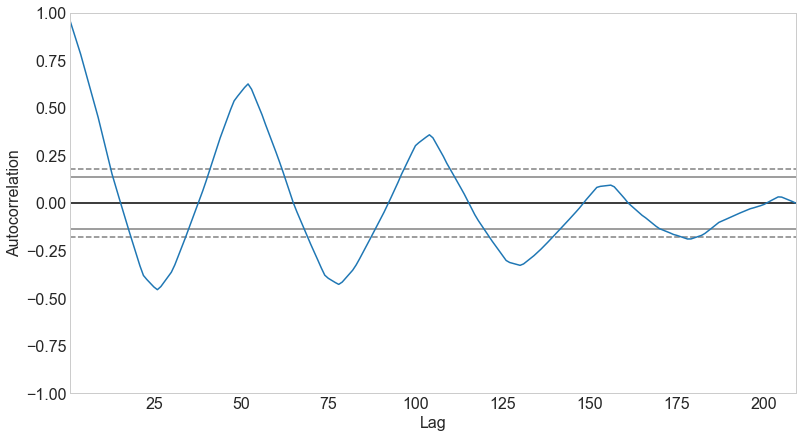

In [20]:
# Autocorrelation after weekly resampling:
pd.plotting.autocorrelation_plot(y.resample('W').mean())

<div class="alert alert-warning">


# 10. Visualize a seasonal decomposition plot on a weekly resampling.


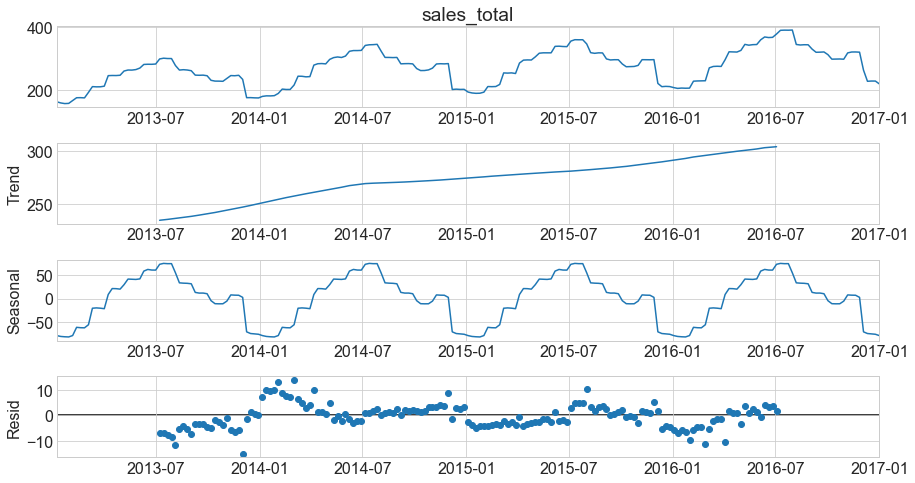

In [21]:
# decompose the data
sm.tsa.seasonal_decompose(y.resample('W').mean()).plot()
# Keep it from repeating
None

<div class="alert alert-success">


# ```OPS``` data

### Load your OPS data using your acquire and/or prepare functions.

In [22]:
# Acquire OPS Data
opsd = acquire.get_opsd_data()
# Prepare OPS Data
opsd = prepare.prep_ops_data(opsd, 'Date')

In [23]:
opsd.T

Date,2006-01-01,2006-01-02,2006-01-03,2006-01-04,2006-01-05,2006-01-06,2006-01-07,2006-01-08,2006-01-09,2006-01-10,...,2017-12-22,2017-12-23,2017-12-24,2017-12-25,2017-12-26,2017-12-27,2017-12-28,2017-12-29,2017-12-30,2017-12-31
Consumption,1069.184,1380.521,1442.533,1457.217,1477.131,1403.427,1300.287,1207.985,1529.323,1576.911,...,1423.23782,1272.17085,1141.7573,1111.28338,1130.11683,1263.94091,1299.86398,1295.08753,1215.44897,1107.11488
Wind,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,228.773,748.074,812.422,587.81,717.453,394.507,506.424,584.277,721.247,721.176
Solar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.065,8.45,9.949,15.765,30.923,16.53,14.162,29.854,7.467,19.98
Wind+Solar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,238.838,756.524,822.371,603.575,748.376,411.037,520.586,614.131,728.714,741.156
day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
day_of_week,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,...,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
weekday_number,7,1,2,3,4,5,6,7,1,2,...,5,6,7,1,2,3,4,5,6,7
year,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
month,January,January,January,January,January,January,January,January,January,January,...,December,December,December,December,December,December,December,December,December,December
month_number,1,1,1,1,1,1,1,1,1,1,...,12,12,12,12,12,12,12,12,12,12


In [24]:
opsd.isnull().sum()

Consumption       0
Wind              0
Solar             0
Wind+Solar        0
day               0
day_of_week       0
weekday_number    0
year              0
month             0
month_number      0
dtype: int64

<div class="alert alert-warning">


# 1. Split the data, so that train contains information up to and including 2013. The remaning data should be placed in test.


In [25]:
# Train test split on the Year:
train = opsd[:'2013']
test = opsd['2014':]

In [26]:
train.shape, test.shape

((2922, 10), (1461, 10))

In [27]:
train

,Consumption,Wind,Solar,Wind+Solar,day,day_of_week,weekday_number,year,month,month_number
Date,,,,,,,,,,
2006-01-01,1069.184,0.000,0.000,0.000,1,Sunday,7,2006,January,1
2006-01-02,1380.521,0.000,0.000,0.000,2,Monday,1,2006,January,1
2006-01-03,1442.533,0.000,0.000,0.000,3,Tuesday,2,2006,January,1
2006-01-04,1457.217,0.000,0.000,0.000,4,Wednesday,3,2006,January,1
2006-01-05,1477.131,0.000,0.000,0.000,5,Thursday,4,2006,January,1
...,...,...,...,...,...,...,...,...,...,...
2013-12-27,1166.552,395.736,41.011,436.747,27,Friday,5,2013,December,12
2013-12-28,1089.790,208.514,21.028,229.542,28,Saturday,6,2013,December,12
2013-12-29,1031.149,213.978,20.933,234.911,29,Sunday,7,2013,December,12


In [28]:
test

,Consumption,Wind,Solar,Wind+Solar,day,day_of_week,weekday_number,year,month,month_number
Date,,,,,,,,,,
2014-01-01,1080.08000,220.085,30.493,250.578,1,Wednesday,3,2014,January,1
2014-01-02,1343.10100,304.166,13.680,317.846,2,Thursday,4,2014,January,1
2014-01-03,1379.77600,340.639,23.510,364.149,3,Friday,5,2014,January,1
2014-01-04,1271.02900,260.828,15.227,276.055,4,Saturday,6,2014,January,1
2014-01-05,1182.41600,175.812,18.067,193.879,5,Sunday,7,2014,January,1
...,...,...,...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,27,Wednesday,3,2017,December,12
2017-12-28,1299.86398,506.424,14.162,520.586,28,Thursday,4,2017,December,12
2017-12-29,1295.08753,584.277,29.854,614.131,29,Friday,5,2017,December,12


### Only use the train data set to perform the following tasks:


<div class="alert alert-warning">


# 2. Visualize your train-test split.


<AxesSubplot:xlabel='Date'>

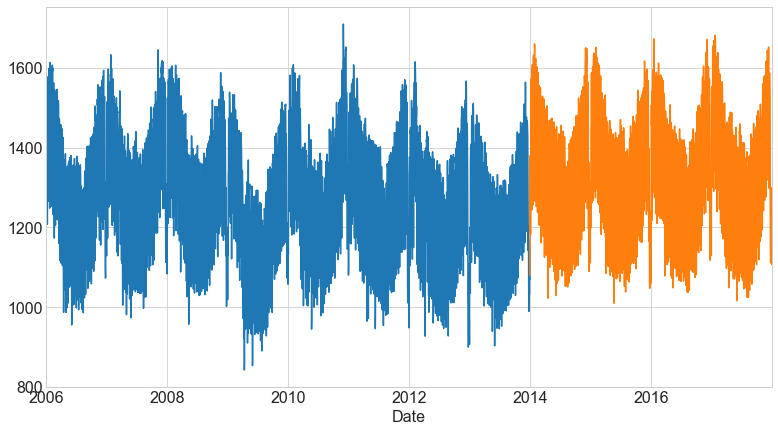

In [29]:
# Visualize the split data:

train.resample('D').Consumption.mean().plot()
test.resample('D').Consumption.mean().plot()

<div class="alert alert-warning">


# 3. Plot the consumption, wind, and solar data on the same chart.



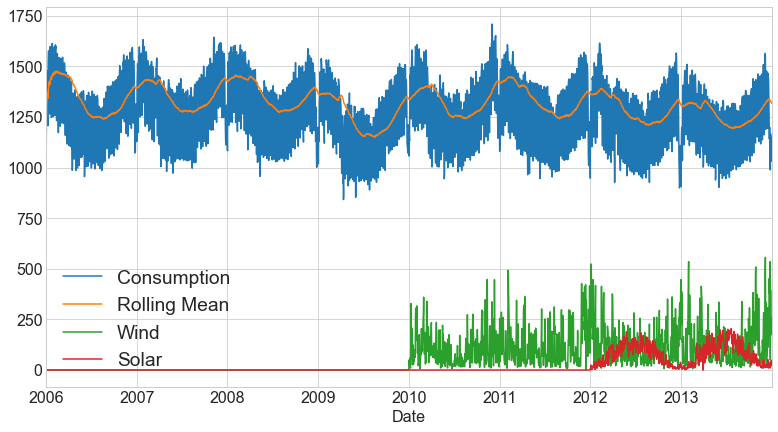

In [30]:
# plot the consumption, wind and solar data

train.Consumption.plot(label="Consumption")
plt.plot(train['Consumption'].rolling('90D').mean(), label="Rolling Mean")
train.Wind.plot()
train.Solar.plot()
plt.legend(loc=3, fontsize='large', fancybox=True)

<div class="alert alert-warning">


# 4. Plot only the consumption data from the year 2010. Are there any patterns you can identify? Note them in a markdown section.


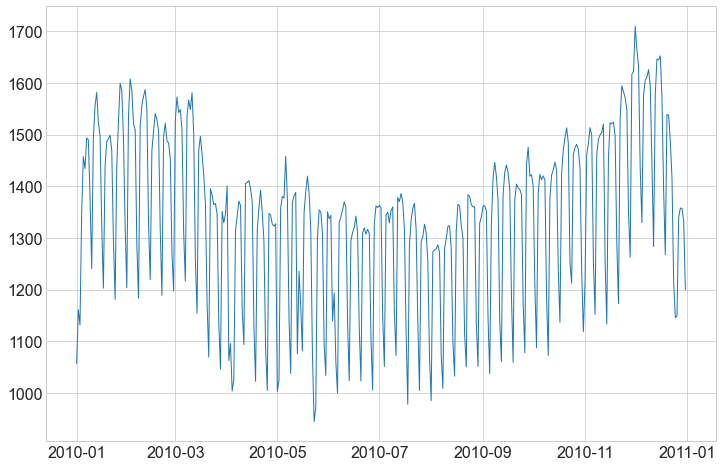

In [31]:
# Show Consumption for 2010
plt.figure(figsize=(12,8))
plt.plot(train.loc['2010-01':'2010-12']['Consumption'], linewidth = 1)
#plt.title("Consumption in 2010")
plt.show()

In [32]:
# Create df with only 2010 records
consumption_2010 = train[train.year == 2010]

In [33]:
consumption_2010

,Consumption,Wind,Solar,Wind+Solar,day,day_of_week,weekday_number,year,month,month_number
Date,,,,,,,,,,
2010-01-01,1057.372,48.709,0.0,0.0,1,Friday,5,2010,January,1
2010-01-02,1161.042,24.628,0.0,0.0,2,Saturday,6,2010,January,1
2010-01-03,1132.069,22.963,0.0,0.0,3,Sunday,7,2010,January,1
2010-01-04,1346.250,59.318,0.0,0.0,4,Monday,1,2010,January,1
2010-01-05,1457.374,41.624,0.0,0.0,5,Tuesday,2,2010,January,1
...,...,...,...,...,...,...,...,...,...,...
2010-12-27,1339.740,48.360,0.0,0.0,27,Monday,1,2010,December,12
2010-12-28,1357.764,52.291,0.0,0.0,28,Tuesday,2,2010,December,12
2010-12-29,1357.192,19.869,0.0,0.0,29,Wednesday,3,2010,December,12


Text(0.5, 0, '2010')

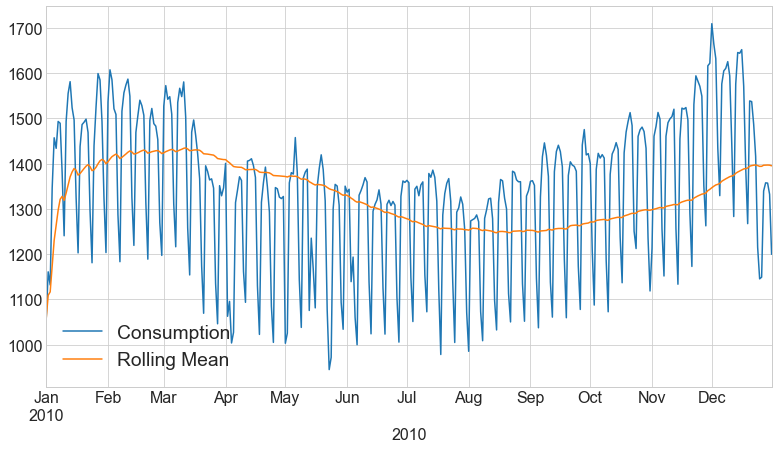

In [34]:
# Daily Consumption with a 120 Day Rolling Average
consumption_2010.Consumption.plot(label="Consumption")
plt.plot(consumption_2010['Consumption'].rolling('120D').mean(), label="Rolling Mean")
plt.legend(loc=3, fontsize='large', fancybox=True)
plt.xlabel('2010')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

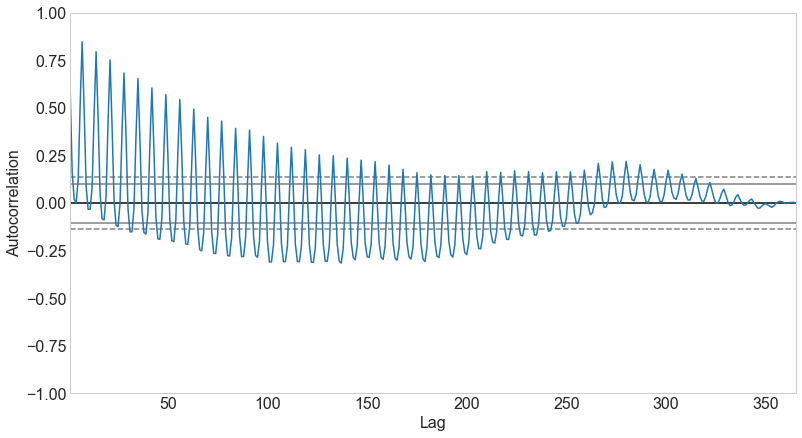

In [35]:
# Resample 2010 Consumption by Day
y = consumption_2010.resample('D').Consumption.mean()

# Show Daily Autocorrelation of Average Consumption for 2010
pd.plotting.autocorrelation_plot(y.resample('D').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

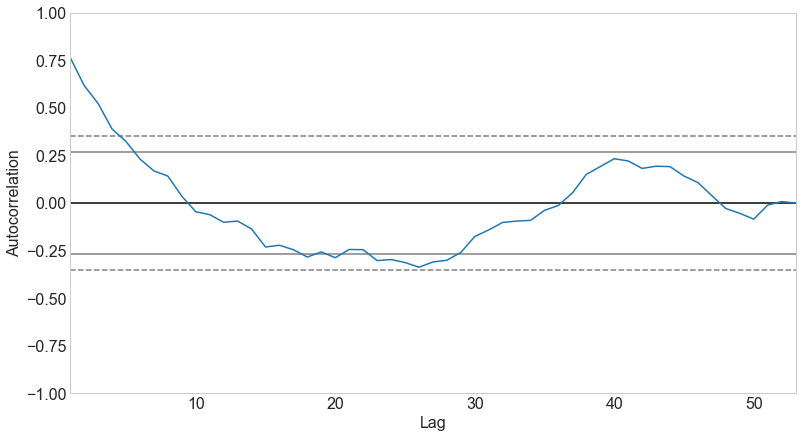

In [36]:
# Show Weekly Autocorrelation of Average Consumption for 2010
pd.plotting.autocorrelation_plot(y.resample('W').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

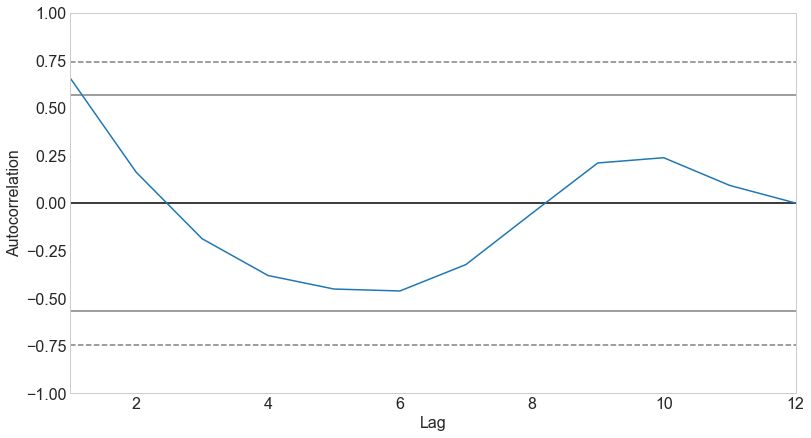

In [37]:
# Show Monthly Autocorrelation of Average Consumption for 2010
pd.plotting.autocorrelation_plot(y.resample('M').mean())

<div class="alert alert-info">


### Observations:
* End of Year and New Year Consumption is highest
* MAR thru JUN Consumption trends down
* JUL thru SEP Consumption trends up and levels for approximately one month
* Then spikes at the end of the year
* This pattern is seasonal year after year

<div class="alert alert-warning">


# 5. Resample the consumption data to monthly and plot it.


<AxesSubplot:xlabel='Date'>

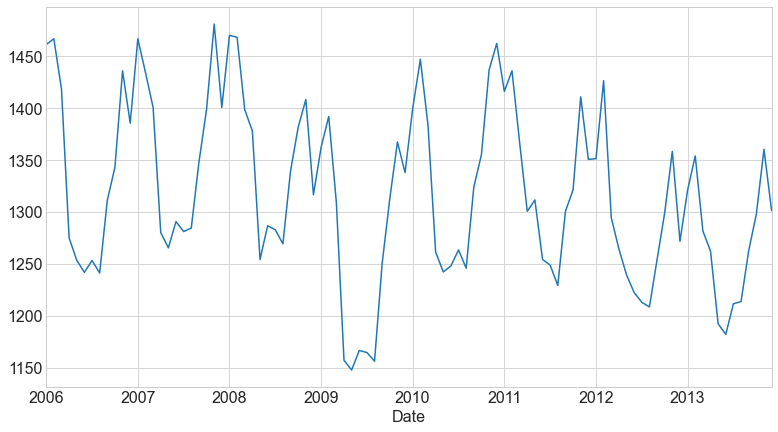

In [38]:
# resample monthly and plot
train.Consumption.resample('M').mean().plot()

<div class="alert alert-warning">


# 6. Resample the consumption data to yearly and plot it.

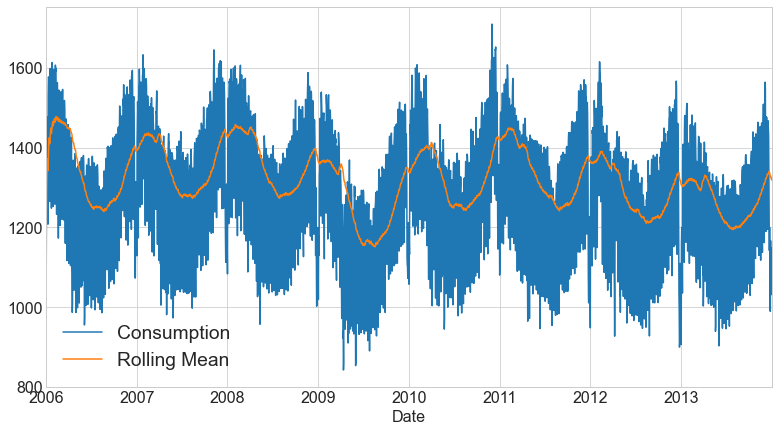

In [40]:
# plot the consumption, wind and solar data

train.Consumption.plot(label="Consumption")
plt.plot(train['Consumption'].rolling('90D').mean(), label="Rolling Mean")
plt.legend(loc=3, fontsize='large', fancybox=True)

(1200.0, 1400.0)

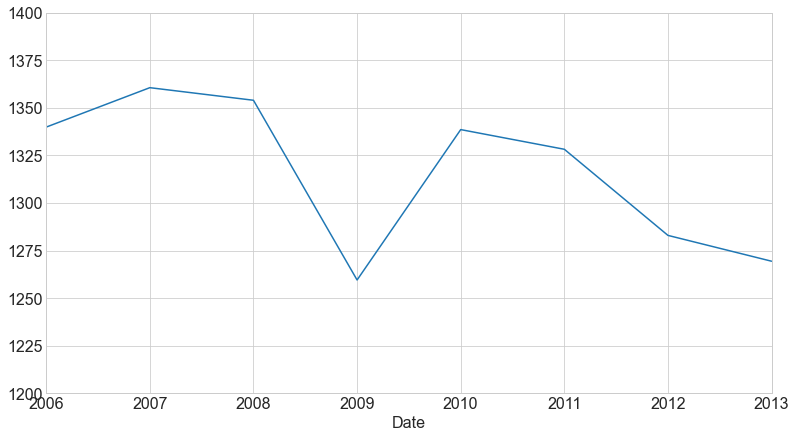

In [41]:
# resample data on yearly basis and plot
train.Consumption.resample('Y').mean().plot()
plt.ylim(1200,1400)

In [42]:
# make a new datafrsame sources
sources = train[['Consumption', 'Wind', 'Solar']]

# make a new column called Conventional: Consumption - Wind - Solar
sources['Conventional'] = sources.Consumption - sources.Wind - sources.Solar

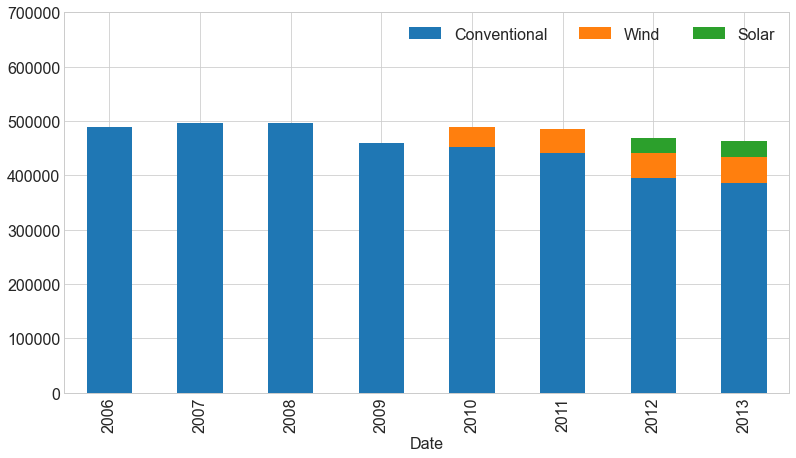

In [43]:
# Plot three power sources as stacked bar chart:

ax = sources[['Conventional', 'Wind', 'Solar']].resample('Y').sum().plot.bar(stacked = True)
ax.set_ylim(0, 700000)
ax.legend(ncol = 3)

labels = [pd.to_datetime(t.get_text()).strftime('%Y') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels);

<div class="alert alert-danger">



# BONUS:

<div class="alert alert-warning">


# 7. Group the consumption data by month and create a boxplot treating the month component as a separate categorical feature.


<AxesSubplot:xlabel='month_number', ylabel='Consumption'>

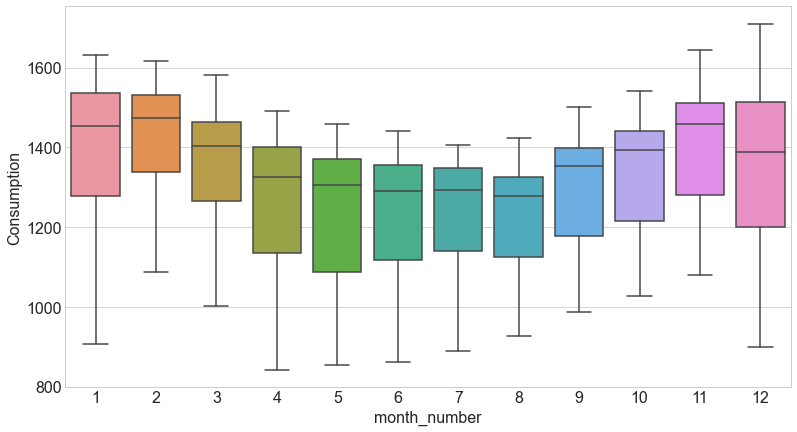

In [39]:
# Energy consumption by month
sns.boxplot(data = train, x = 'month_number', y = 'Consumption')
#ax.tick_params(axis='x', rotation=45)

<div class="alert alert-warning">


# 8. Group the consumption data by weekday and create a boxplot treating the weekday component as a separate categorical feature.


<AxesSubplot:xlabel='day_of_week', ylabel='Consumption'>

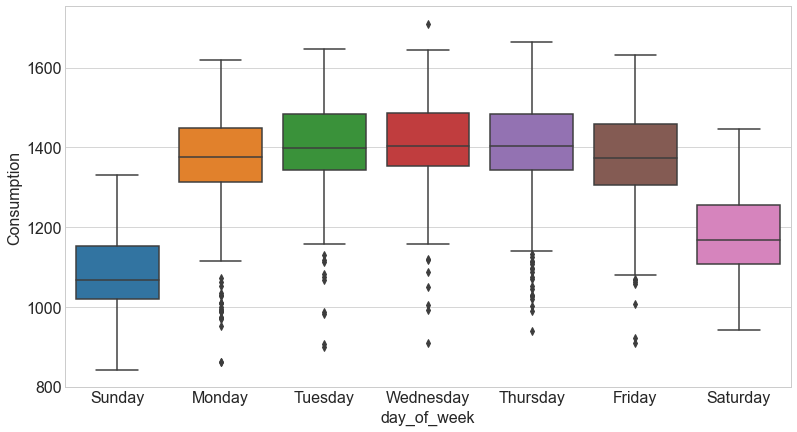

In [51]:
# Energy consumption by month
sns.boxplot(data = train, x = 'day_of_week', y = 'Consumption')
#ax.tick_params(axis='x', rotation=45)

<div class="alert alert-warning">


# 9. Create a subseasonal plot by month of your consumption data.


In [52]:
y = train.Consumption
table = y.groupby([y.index.strftime('%Y'), y.index.strftime('%m-%b')]).mean().unstack()

table.head()

Date,01-Jan,02-Feb,03-Mar,04-Apr,05-May,06-Jun,07-Jul,08-Aug,09-Sep,10-Oct,11-Nov,12-Dec
Date,,,,,,,,,,,,
2006,1461.442065,1467.106893,1418.649161,1275.058900,1253.488484,1241.781667,1253.296290,1241.188774,1311.169933,1343.161903,1436.164133,1385.686355
2007,1467.058032,1434.484357,1400.909871,1280.133167,1265.436000,1290.828733,1281.134258,1284.554355,1347.857500,1398.924581,1481.237600,1400.840161
2008,1470.373484,1468.486207,1398.653258,1378.243233,1254.194226,1286.797100,1282.866355,1269.323484,1339.615433,1381.788323,1408.506233,1316.669129
2009,1362.255613,1392.155179,1309.222387,1157.006367,1147.650742,1166.456833,1164.515871,1156.114645,1250.585967,1312.905000,1367.505100,1337.995581
2010,1400.041677,1447.322536,1383.865226,1261.505467,1242.220129,1247.938433,1263.467452,1245.832323,1324.003533,1355.390839,1436.854833,1462.556581


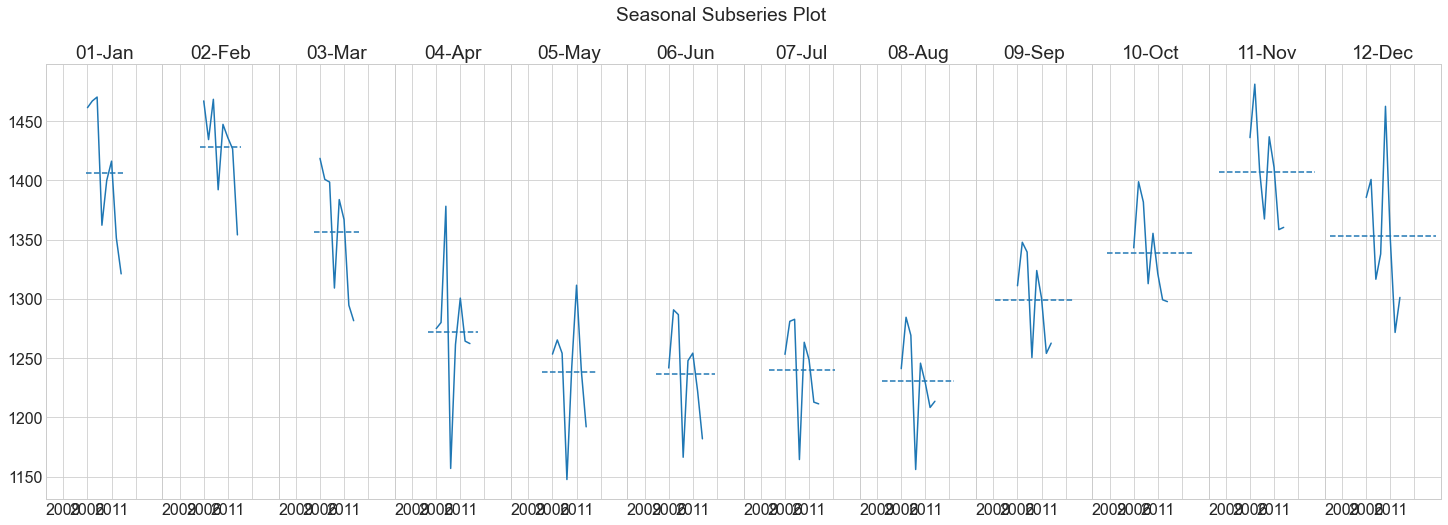

In [53]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True, figsize=(25,8))
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

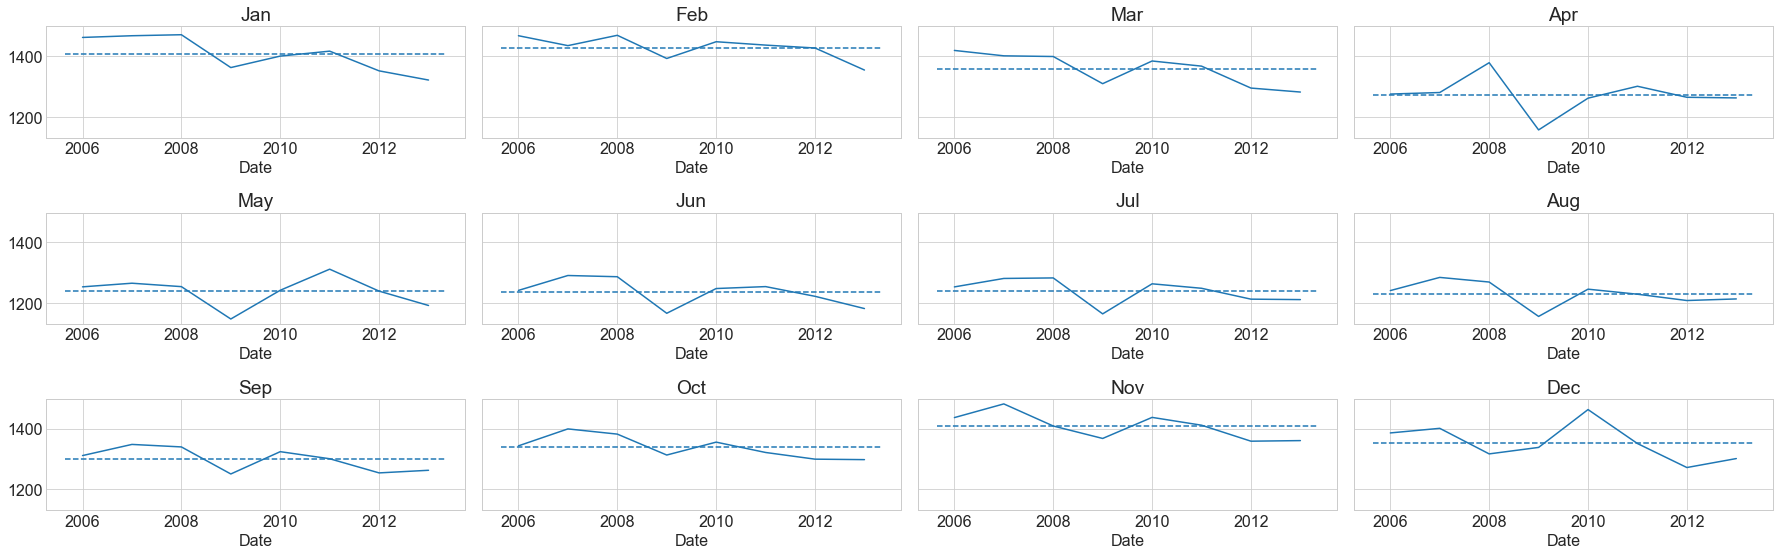

In [54]:
fig, axs = plt.subplots(3, 4, sharex=False, sharey=True, figsize=(25,8))

for ax, (month, subset) in zip(axs.ravel(), table.iteritems()):
    subset.plot(ax=ax, title=month[3:])
    ax.hlines(subset.mean(), *ax.get_xlim(), ls = '--')
fig.subplots_adjust(wspace=0)
plt.tight_layout()

<div class="alert alert-warning">


# 10. Create one or two visualizations that helps answer the follow questions: How does wind production/consumption vary within a year? How does wind production/consumption vary from year to year?


[Text(0.5, 1.0, 'Wind production pattern')]

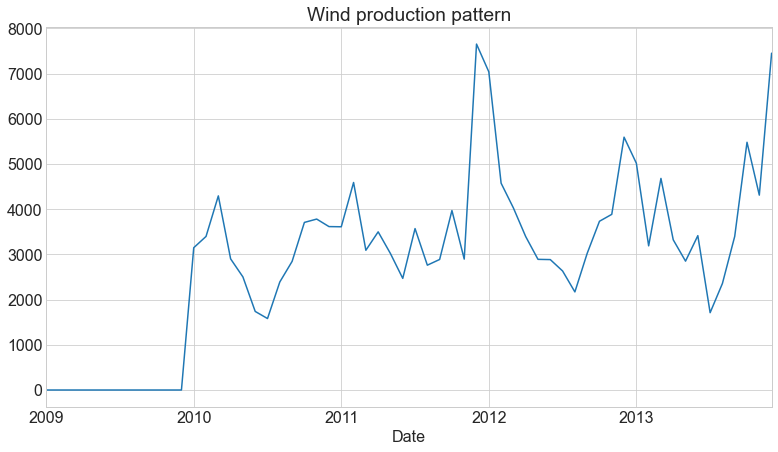

In [65]:
# How does the wind production/consumption vary within a year and also year to year?
ax = train['2009':].Wind.resample('M').sum().plot()
ax.set(title = 'Wind production pattern')

<div class="alert alert-warning">


# 11. Create one or two visualizations that helps answer the follow questions: How does solar production/consumption vary within a year? How does solar production/consumption vary from year to year?


[Text(0.5, 1.0, 'Solar production pattern')]

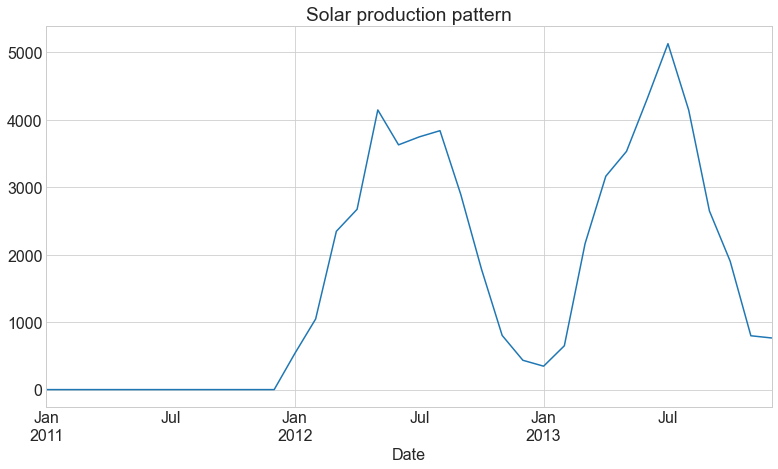

In [64]:
# How does the solar production/consumption vary within a year and also year to year?
ax = train['2011':].Solar.resample('M').sum().plot()
ax.set(title = 'Solar production pattern')

<div class="alert alert-warning">


# 12. Plot a time series decomposition for your consumption data and note your takeaways.


In [45]:
decomposition = sm.tsa.seasonal_decompose(train.resample('W').Consumption.mean(), model='additive')

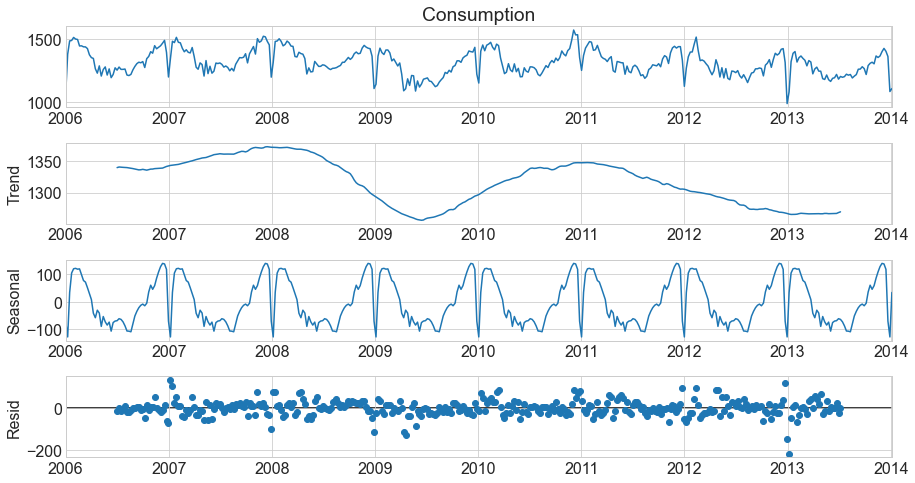

In [46]:
decomposition.plot()
None

<div class="alert alert-warning">


# 13. Create an autocorrelation plot of a weekly resampling of the consumption data.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

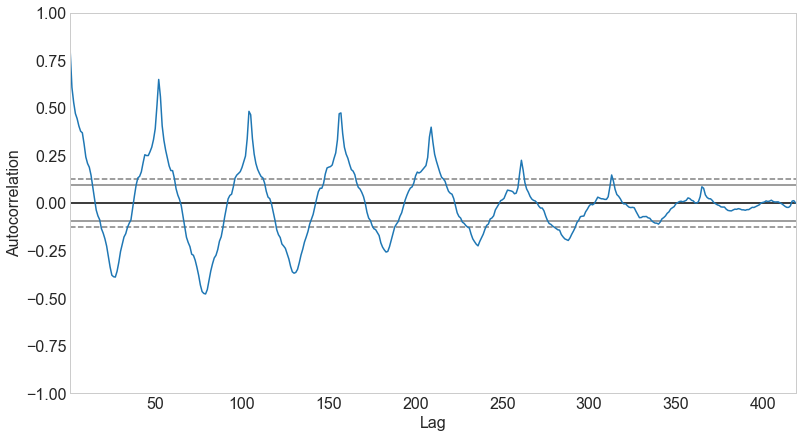

In [47]:
# autocorrelation plot 
pd.plotting.autocorrelation_plot(train.Consumption.resample('W').mean())

```quit()```... |